In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values

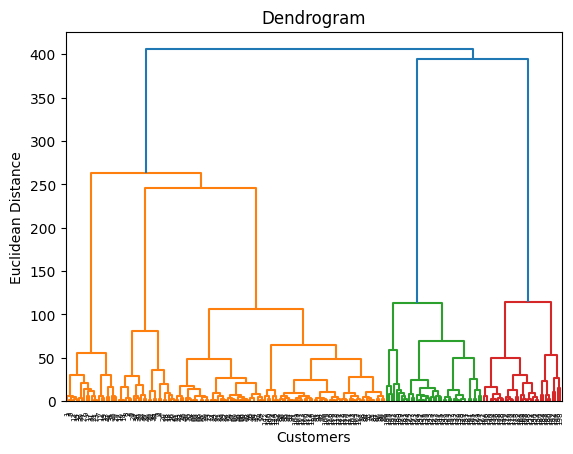

In [ ]:
#It make memory of how the each cluster form in the way from starting and it is stored in dimport
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters = 5,  linkage='ward')
y_hc = ag.fit_predict(x)

In [ ]:
centroids = []
for i in range(5):  # Assuming 5 clusters
    centroids.append(np.mean(x[y_hc == i], axis=0))

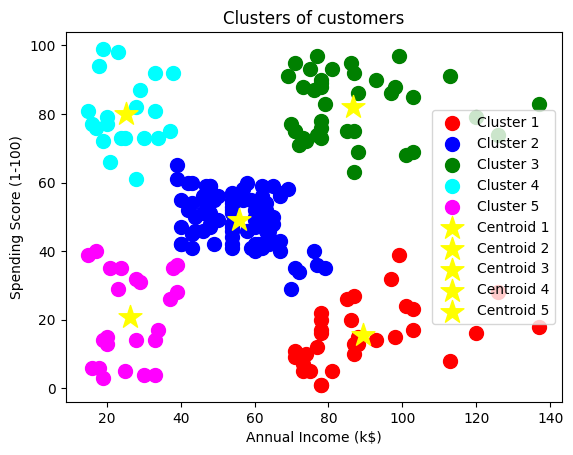

In [ ]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
for i in range(5):
    plt.scatter(centroids[i][0], centroids[i][1], s=300, c='yellow', marker='*', label=f'Centroid {i + 1}')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

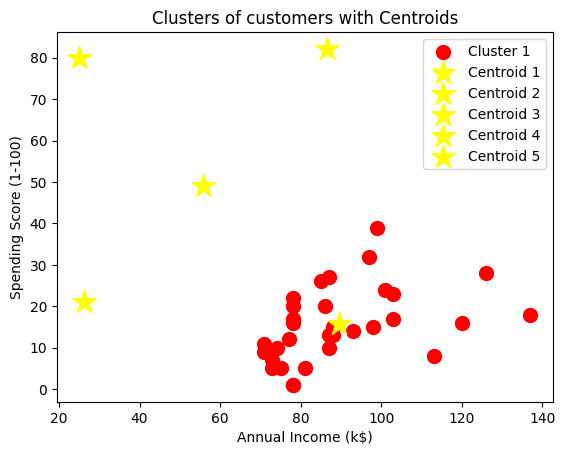

In [ ]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
# ... (similar lines for other clusters)

# Plot centroids
for i in range(5):
    plt.scatter(centroids[i][0], centroids[i][1], s=300, c='yellow', marker='*', label=f'Centroid {i + 1}')

plt.title('Clusters of customers with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


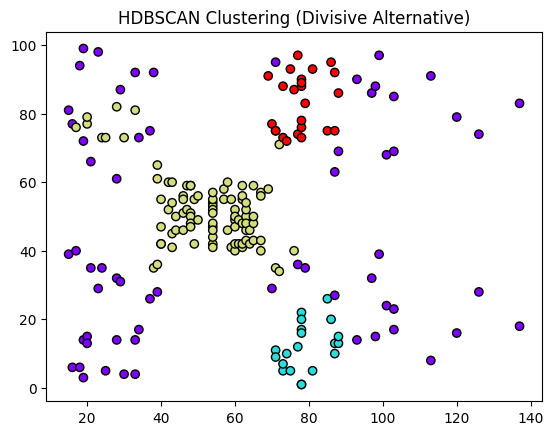

In [43]:
!pip install hdbscan  # Install the library if not installed

import hdbscan

# from cluster_division import cluster_division as cd
# labels = cd.divisive_clustering(x, method='ward', max_clusters=5)



# plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s=100, c='red', label='Cluster 1')
# plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s=100, c='blue', label='Cluster 2')
# # ... (similar lines for other clusters, if any)

# plt.title('Clusters of customers (Divisive)')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()


clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
labels = clusterer.fit_predict(x)

# Plot the clusters
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow', marker='o', edgecolors='k')
plt.title("HDBSCAN Clustering (Divisive Alternative)")
plt.show()